In [33]:
import numpy as np
from numpy.linalg.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.markers import MarkerStyle
import cartopy.crs as ccrs
import cartopy.feature as cfeaturel
import pandas as pd

# データの読み込み os.path.join を用いる

lt_0 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_0day.npz'
lt_1 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_1day.npz'
lt_3 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_3day.npz'
lt_5 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_5day.npz'
lt_10 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_10day.npz'
lt_15 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_15day.npz'
lt_20 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_20day.npz'
#lt_25 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_25day.npz'
#lt_30 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_30day.npz'
#lt_35 = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/result-value_7vals_35day.npz'

df_0 = np.load(lt_0)
df_1 = np.load(lt_1)
df_3 = np.load(lt_3)
df_5 = np.load(lt_5)
df_10 = np.load(lt_10)
df_15 = np.load(lt_15)
df_20 = np.load(lt_20)
#df_25 = np.load(lt_25)
#df_30 = np.load(lt_30)
#df_35 = np.load(lt_35)


In [34]:
df_box = [df_0, df_1, df_3, df_5, df_10, df_15, df_20]
pred = []
sup  = []
for data in df_box:
    pred_i = data['arr_0']
    sup_i = data['arr_1']
    pred.append(pred_i)
    sup.append(sup_i)
    print('pred, sup = ', pred_i.shape, sup_i.shape)

pred, sup =  (2486, 2) (2486, 2)
pred, sup =  (2485, 2) (2485, 2)
pred, sup =  (2483, 2) (2483, 2)
pred, sup =  (2481, 2) (2481, 2)
pred, sup =  (2476, 2) (2476, 2)
pred, sup =  (2471, 2) (2471, 2)
pred, sup =  (2466, 2) (2466, 2)


In [31]:
# 相関係数の計算
def culc_cor(test_data, pred_data):
    j = 0
    cor = (np.sum(pred_data[:,2*j] * test_data[:,2*j], axis=0) + np.sum(pred_data[:,2*j+1] * test_data[:,2*j+1], axis=0)) / \
            (np.sqrt(np.sum(pred_data[:,2*j] ** 2 + pred_data[:,2*j+1] ** 2, axis=0)) * np.sqrt(np.sum(test_data[:,2*j] ** 2 + test_data[:,2*j+1] ** 2, axis=0)))
    #print('cor : = ', cor)
    return cor

In [35]:
lead_time = [0, 1, 3, 5, 10, 15, 20]
cor = np.zeros((len(lead_time), 5))
for i in range(len(pred)):
    rt = pd.date_range('2015-01-01', periods=len(pred[i]), freq='D')    # real time のインデックスは'与えるデータの初期時刻'で定めておく
    
    jja = jja = rt.month.isin([6, 7, 8])
    djf = rt.month.isin([12, 1, 2])
    mjjaso = rt.month.isin([5, 6, 7, 8, 9, 10])
    ndjfma = rt.month.isin([11, 12, 1, 2, 3, 4])
    pred_jja     = pred[i][jja]
    pred_djf     = pred[i][djf]
    pred_mjjaso  = pred[i][mjjaso]
    pred_ndjfma  = pred[i][ndjfma]
    sup_jja      = sup[i][jja]
    sup_djf      = sup[i][djf]
    sup_mjjaso   = sup[i][mjjaso]
    sup_ndjfma   = sup[i][ndjfma]
    print('=== lead time : {} day ==='.format(lead_time[i]))
    cor[i, 0]   = culc_cor(sup_jja, pred_jja)
    cor[i, 1]   = culc_cor(sup_djf, pred_djf)
    cor[i, 2]   = culc_cor(sup_mjjaso, pred_mjjaso)
    cor[i, 3]   = culc_cor(sup_ndjfma, pred_ndjfma)
    cor[i, 4]   = culc_cor(sup[i], pred[i])
print('jja, djf, mjjaso, ndjfma, all')
print(cor)

=== lead time : 0 day ===
=== lead time : 1 day ===
=== lead time : 3 day ===
=== lead time : 5 day ===
=== lead time : 10 day ===
=== lead time : 15 day ===
=== lead time : 20 day ===
jja, djf, mjjaso, ndjfma, all
[[0.94280845 0.85246654 0.92272197 0.86771823 0.90506729]
 [0.94387749 0.87039284 0.9250914  0.87813135 0.91024591]
 [0.93925297 0.87536287 0.92013695 0.8787622  0.90727576]
 [0.92488935 0.84792154 0.90085545 0.86108776 0.88814191]
 [0.8805689  0.76705948 0.85043332 0.76793077 0.82407766]
 [0.79580283 0.63279121 0.74524018 0.62391702 0.70684506]
 [0.71452347 0.49347306 0.66804278 0.4825113  0.60418536]]


In [38]:
cor_mm = np.zeros((len(lead_time),12))
for i in range(len(pred)):
    rt = pd.date_range('2015-01-01', periods=len(pred[i]), freq='D')    # real time のインデックスは'与えるデータの初期時刻'で定めておく
    for m in range(1, 13):
        mm = rt.month == m
        pred_m          = pred[i][mm]
        sup_m           = sup[i][mm]
        cor_mm[i, m-1]  = culc_cor(sup_m, pred_m)

print(cor_mm)

[[0.847596   0.80777109 0.84597419 0.85963389 0.9157701  0.94957841
  0.95753849 0.91207792 0.84886994 0.91160138 0.90816222 0.89232055]
 [0.85839766 0.81686652 0.86282019 0.88411918 0.92321693 0.94948357
  0.95630051 0.91683858 0.8516954  0.9121247  0.89965168 0.92399052]
 [0.87423655 0.82028408 0.86579925 0.88667418 0.91781003 0.95570616
  0.95000496 0.8994681  0.85430452 0.90721856 0.89168694 0.91865911]
 [0.82928229 0.7944147  0.83884858 0.87957716 0.86837011 0.93837765
  0.94326146 0.87443335 0.84300469 0.89393352 0.89500048 0.90663575]
 [0.73667667 0.7259962  0.73875526 0.77745252 0.78660431 0.89004569
  0.89604997 0.83517749 0.79636005 0.84159117 0.79133145 0.82594243]
 [0.52061812 0.67136262 0.56140629 0.63105993 0.63238915 0.81156145
  0.80974874 0.75754345 0.67564    0.72653572 0.644077   0.7173048 ]
 [0.41175506 0.51531256 0.50771242 0.52994635 0.60491949 0.76226783
  0.70798037 0.656399   0.54488947 0.64728248 0.4034683  0.56725397]]


[ 1  2  3  4  5  6  7  8  9 10 11 12]


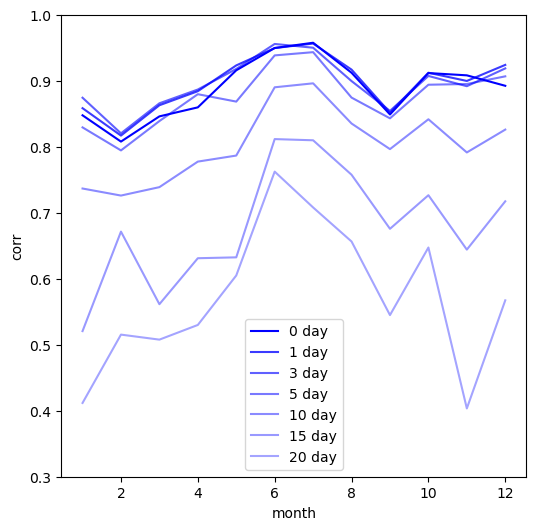

In [69]:
x_month = np.arange(1, 13)
print(x_month)
plt.figure(figsize=(6, 6))
for j in range(len(lead_time)):
    plt.plot(x_month, cor_mm[j,:], color='b', alpha=1/(j*.3+1), label='{} day'.format(lead_time[j]))  
plt.ylim(0.3,1.0)
plt.xlabel('month')
plt.ylabel('corr')
plt.legend()